# Orientation Preference Maps

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import filters
import scipy.stats as ss

import sys
sys.path.append("..")

from opm import make_opm, plot_opm, plot_amplitude_map, calculate_map
from opm.plot import plot_orientation_histogram
from opm.response import response, create_stimuli, compute_responses

In [2]:
np.random.seed(123)

## Ground truth map
We first create a "ground truth" orientation preference map. The real part a(x) and the imaginary part b(x) are created as standard Gaussian white noise, which is then convoluted with a difference of Gaussians filter (equations are analogous for b(x)):

$ \tilde{a}(x) = \mathcal{N}(0, 1) $

$
a(x) = \tilde{a}(x) * \mathcal{N}(x \;|\; 0, \sigma^2) - \tilde{a}(x) * \mathcal{N}(x \;|\; 0, k \sigma^2)
$

The orientation preference map is then

$ m(x) = a(x) + i b(x)  = A(x) \; exp[2i \, \theta(x)]$, 

where $A(x)$ is the absolute value of $m(x)$ and $2 \theta(x)$ is the argument of $m(x)$.

The pinwheels are detected as zero-crossings of the real and imaginary parts of the map.

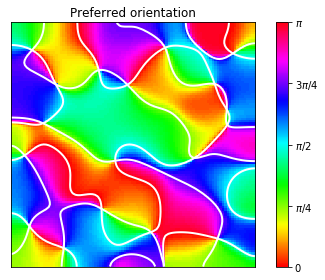

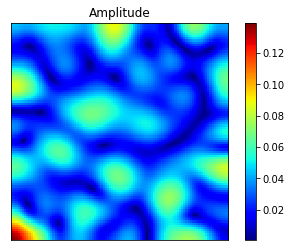

In [3]:
m = make_opm(size=100, sigma=8.)

f, ax = plot_opm(m, shade=False)

f.tight_layout()
#f.savefig('plots/opm_shade.pdf')
plt.show()

f, ax = plot_amplitude_map(m)

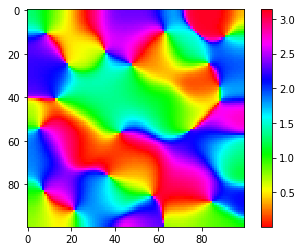

In [25]:
plt.imshow(m1, cmap="hsv")
plt.colorbar()

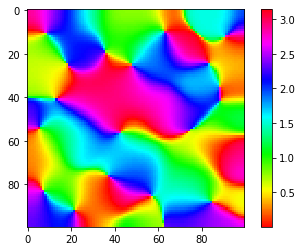

In [24]:
plt.imshow(m2, cmap="hsv")
plt.colorbar()

In [12]:
m1 = (np.angle(m) + np.pi) / 2

m2 = np.angle(m) / 2 % np.pi



(array([1160., 1133.,  812.,  755., 1195.,  962., 1115., 1125.,  857.,
         886.]),
 array([3.42529312e-05, 3.14130631e-01, 6.28227008e-01, 9.42323386e-01,
        1.25641976e+00, 1.57051614e+00, 1.88461252e+00, 2.19870890e+00,
        2.51280527e+00, 2.82690165e+00, 3.14099803e+00]),
 <a list of 10 Patch objects>)

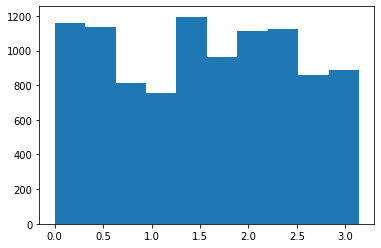

In [18]:
plt.hist(m1.flatten())

(array([ 963., 1113., 1127.,  855.,  887., 1160., 1132.,  812.,  755.,
        1196.]),
 array([1.46661448e-04, 3.14290227e-01, 6.28433793e-01, 9.42577359e-01,
        1.25672092e+00, 1.57086449e+00, 1.88500806e+00, 2.19915162e+00,
        2.51329519e+00, 2.82743875e+00, 3.14158232e+00]),
 <a list of 10 Patch objects>)

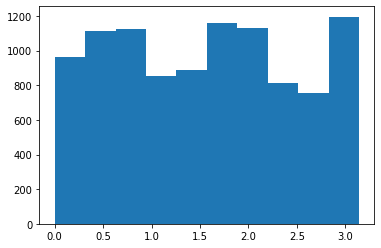

In [21]:
plt.hist(m2.flatten())

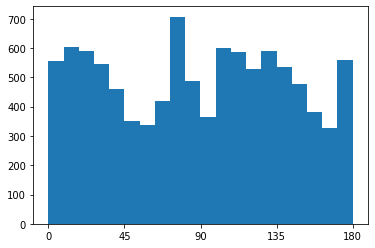

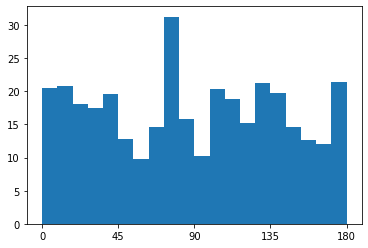

In [4]:
plot_orientation_histogram(m)
plt.show()

plot_orientation_histogram(m, weighted=True)
plt.show()

## Response model
Now we want to model the response to a stimulus

$\mathbf{s} = \begin{pmatrix}s_1 \\ s_2\end{pmatrix}$ with  $s_1 + s_2 = c_s \; exp(2i \, \theta_s)$,

where $c_s$ is the contrast of the stimulus and $\theta_s$ is the orientation of the stimulus.

We assume that the response at the pixel x is a linear function of the real and imaginary parts of the orientation map with additional Gaussian noise $\epsilon$ with variance $\sigma^2_n$:

$ r(x, s) = a(x) \, s_1(x) + b(x) \, s_2(x) + c + \epsilon \\
  = A \, cos(2\theta) \, c_s \, cos(2\theta_s) + A \, sin(2\theta) \, c_s \, sin(2\theta_s) + c + \epsilon
 $
 
Applying $ cos(\alpha - \beta) = cos(\alpha) cos(\beta) + sin(\alpha) sin(\beta) $, we obtain

$ r(x, s) = A \, c_s \, cos(2(\theta - \theta_s)) + c + \epsilon $

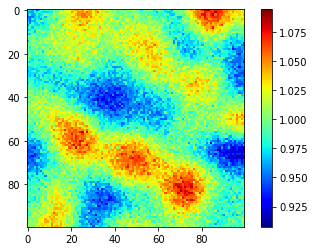

/home/piplab/python-venvs/default/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


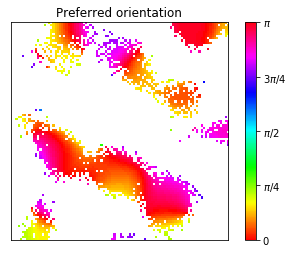

In [5]:
# we now assume we observe a stimulus with contrast c_s and orientation theta_s
c_s = 1.0
theta_s = 0 - np.pi/2

r = response(m, c_s, theta_s, c=1., sigma=0.01)

# plot response
im = plt.imshow(r, cmap='jet')
#im.set_clim(.7, 1.2)
plt.colorbar()

plt.show()

# check that the orientation that we have chosen is actually the one with the highest activity
mx = m.copy()
mx[r < 1.02] = np.nan

theta, theta_rgb = plot_opm(mx, pinwheels=False)

plt.show()

We create a set of trials with different contrast and orientation conditions and compute the respective responses

In [6]:
contrasts = [1.0]
orientations = [i * np.pi / 4 - np.pi / 2 for i in range(4)]
repetitions = 16

S = create_stimuli(contrasts, orientations, repetitions)
R = compute_responses(m, contrasts, orientations, repetitions, sigma=0.1)

In [7]:
R.shape

(4, 16, 100, 100)

In [8]:
S[0]

array([[-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01]])

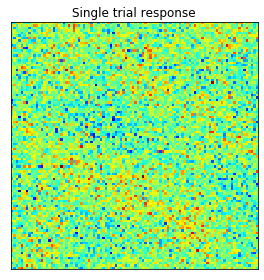

In [9]:
f, ax = plt.subplots()
ax.imshow(R[0,0,:,:], cmap='jet')
ax.set_xticks([])
ax.set_yticks([])
plt.title('Single trial response')
plt.tight_layout()


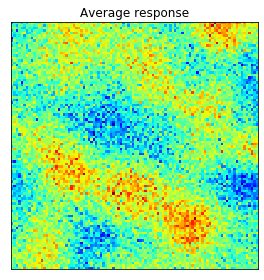

In [10]:
f, ax = plt.subplots()
ax.imshow(R.mean(axis=1)[0], cmap='jet')
ax.set_xticks([])
ax.set_yticks([])
plt.title('Average response')
plt.tight_layout()


## Maximum likelihood inference
Assume that we have observed activities for a set of N stimuli:

responses $ r_1(x) ... r_N(x) $

orientations $ \theta_1^s(x) ... \theta_N^s(x) $

contrasts $ c_1^s(x) ... c_N^s(x) $

Remember our model above:
$ r(x) = \mathbf{a}(x)^T \, s + c + \epsilon $, where $\mathbf{a}(x) = \begin{pmatrix}a(x) \\ b(x) \end{pmatrix}$,

which is a simple linear regression problem. The maximum likelihood estimate of $\mathbf{a}(x)$ is

$ \mathbf{\hat{a}}(x)  = (\sum_i \mathbf{s}_i \mathbf{s}_i^T)^{-1} \; \sum_i \mathbf{s}_i r_i(x) \\
= (\mathbf{S}^T \mathbf{S})^{-1} \, \mathbf{S}^T \, \mathbf{r}(x)$


In [14]:
M = calculate_map(R, S)
m_hat = (M[0] + 1j * M[1]).reshape((100, 100))

In [15]:
M.shape

(3, 10000)

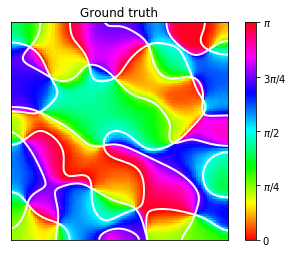

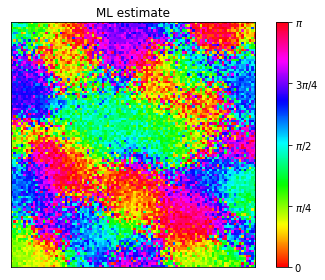

3.141438208508857

In [17]:

# plot ground truth
plot_opm(m, title='Ground truth')
plt.show()

plot_opm(m_hat, title='ML estimate', pinwheels=False)
plt.tight_layout()
plt.show()

((np.angle(m_hat) + np.pi) / 2).max()

We smoothe the raw estimate with a Gaussian kernel. The variance of the Gaussian kernel is chosen in order to optimize the correlation with the ground truth map. 

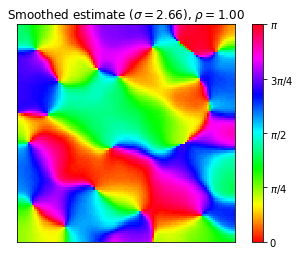

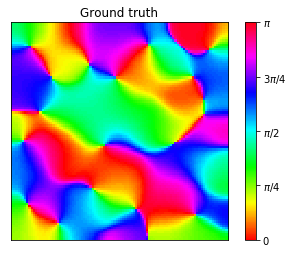

In [30]:
best_corr = -np.inf
best_sigma = np.nan
for sigma in 10**np.linspace(-2, 2, 100):
    
    # smoothe the estimate of the angle
    m_smooth = filters.gaussian_filter(M, sigma=(0, sigma, sigma))
    
    corr = ss.pearsonr(m_smooth[:2].reshape(-1), np.vstack((np.real(m), np.imag(m))).reshape(-1))[0]
    
    #plot_opm(m_smooth[0] + 1j * m_smooth[1], title=r'$\sigma = {0:.2f}$, $\rho = {1:.2f}$'.format(sigma, corr), pinwheels=False)
    #plt.show()
    
    if corr > best_corr:
        best_corr = corr
        best_sigma = sigma
        best_theta = m_smooth[0] + 1j * m_smooth[1]
        

plot_opm(best_theta, pinwheels=False,
         title=r'Smoothed estimate ($\sigma = {0:.2f}$), $\rho = {1:.2f}$'.format(best_sigma, best_corr))
plt.show()


plot_opm(m, title='Ground truth', pinwheels=False)
plt.show()

Now compare the preferred orientations of the ground truth map with the estimated map.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f51786d5cc0>)

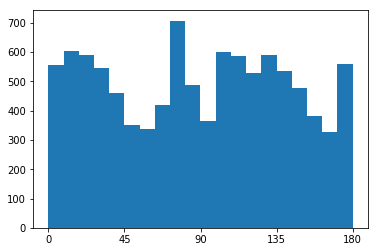

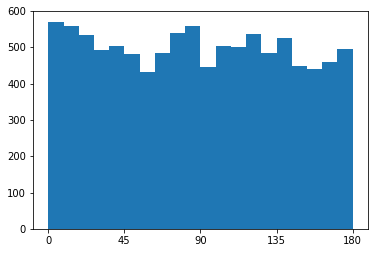

In [31]:
plot_orientation_histogram(m)

plot_orientation_histogram(m_hat)

In [32]:
from opm.gp import GaussianProcessOPM
from opm.gp.kernels import mexican_hat_kernel, fixed_k_mexhat

size = (100, 100)
gp = GaussianProcessOPM(size=size)

In [33]:
params = gp.optimize(S, R, verbose=True, p0={'sigma': 10.0, 'alpha': 2.0})

Estimating prior hyperparameters:
{'sigma': 7.26889548317927, 'alpha': 1.056294889176594}


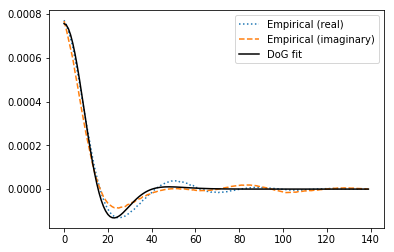

In [34]:
from opm.gp.match_radial_component import radial_component
from opm.gp.kernels import mexican_hat_kernel

corr_real, r  = radial_component(np.real(m))
corr_imag, r  = radial_component(np.imag(m))

plt.plot(r, corr_real, label='Empirical (real)', linestyle=':', color='C0')
plt.plot(r, corr_imag, label='Empirical (imaginary)', linestyle='--', color='C1')

plt.plot(r, mexican_hat_kernel(r[:,np.newaxis], 0, sigma=params['sigma'], alpha=params['alpha']), label='DoG fit', color='black')
plt.legend()
#plt.savefig('plots/dog_fit.pdf')

In [35]:
gp.idx.shape

(10000, 2)

In [37]:
gp.fit(stimuli=S, responses=R, rank=1600, noise=np.eye(100*100)*0.1**2, verbose=True, p0={'sigma': 10.0, 'alpha': 2.0})

*** Fitting prior ***
Using previously fit prior..
*** Fitting posterior ***


array([[[ 1.26187131e-03,  7.18745709e-04,  1.16766323e-03, ...,
         -7.24785391e-04, -8.66174681e-04, -1.34080666e-03],
        [ 6.78628040e-04,  7.29539414e-04,  1.40673855e-03, ...,
         -1.46284494e-03, -9.94765770e-04, -1.21363930e-03],
        [ 1.15378032e-03,  9.35063694e-04,  1.19952874e-03, ...,
         -8.71603305e-04, -7.69838963e-04, -8.65291065e-04],
        ...,
        [-5.61454690e-04, -9.35888768e-05, -2.02317344e-04, ...,
          4.89791854e-04,  5.31456469e-04,  5.25314181e-04],
        [ 2.20218331e-04, -2.06961272e-04, -3.72877104e-04, ...,
          2.84260987e-05,  4.81063027e-04,  5.50842478e-04],
        [-2.00840081e-04,  4.86081983e-05, -3.90237885e-04, ...,
         -9.34858986e-05, -1.42264025e-04,  1.96893337e-04]],

       [[-3.85199656e-04, -5.91232053e-04, -4.65453695e-04, ...,
         -4.33069172e-04, -8.51285640e-04, -7.46542786e-04],
        [-2.51926126e-04, -8.94546657e-04, -7.70892070e-04, ...,
         -6.14173013e-04, -1.05739503e

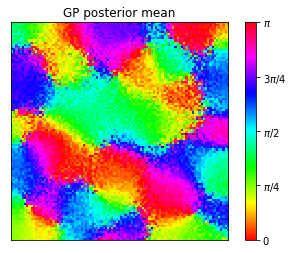

In [41]:
result = gp.mu_post[0] + 1j * gp.mu_post[1]
f, ax = plot_opm(result, title='GP posterior mean', pinwheels=False)

plt.savefig('plots/gp_mean.pdf')

In [39]:
gp.kernel_params

{'sigma': 7.26889548317927, 'alpha': 1.056294889176594}

In [40]:
gp.noise.covariance

array([[0.01, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.01]])